## PROJECT: Wrangle & Analyze Data
### Twitter data of @WeRateDogs

## CONTENTS:
<ol>
<li>Gathering Data</li>
<li>Data Assessment</li>
    <ol>
        <li>Visual Assessment</li>
        <li>Programatic Assessment</li>
    </ol>
<li>Cleaning Data</li>
<li>Storing,Analyzing & Visualizing Data</li>
    

</ol>

## Gathering Data
<ol>
<li>Twitter archive file: twitter_archive_enhanced.csv</li>
<li>The tweet image predictions: URL- https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv using Request library</li>
<li>Twitter API & JSON: Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file</li>

</ol>


#### 1.Twitter Archive File:

In [1]:
#code for gathering data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

import tweepy
import json

In [2]:
#loading data into the pandas dataframe
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#test
twitter_data.sort_values('timestamp')
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2. Tweet Image Prediction:


In [5]:
#code for gathering data from the udacity servers
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
#test
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

#### 3. Twitter API & Json:

In [8]:
#code for gathering data from the twitter api called tweepy
        
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
#cant_find_tweets_for_those_ids = []
list_of_tweets_not_found=[]

for tweet_id in twitter_data['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        list_of_tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 740
Rate limit reached. Sleeping for: 738


In [9]:
print(len(list_of_tweets))
print(len(list_of_tweets_not_found))

2331
25


In [10]:
my_list_of_dicts=[]
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

#print(my_list_of_dicts)

In [11]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
#test
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
378,825829644528148480,12712,2475,8849318,17,Twitter for iPhone,Original tweet,https://t.co/YimNdkZrhM
1292,706644897839910912,2527,1068,8849329,17,Twitter for iPhone,Original tweet,https://t.co/cdOkfEpjFw
214,849412302885593088,15477,3044,8849318,17,Twitter for iPhone,Original tweet,https://t.co/Uq3ChFgWA3
1619,683857920510050305,3747,1098,8849971,17,Twitter for iPhone,Original tweet,https://t.co/LoKVvc1xAW
1421,696518437233913856,3844,1681,8849329,17,Twitter for iPhone,Original tweet,r


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


## Data Assessment:
#### Visual Assessment

In [15]:
twitter_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
278,840268004936019968,NaN,NaN,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monty. He makes instantly regrettable ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840268004...,12,10,Monty,None,None,None,None
1570,687732144991551489,NaN,NaN,2016-01-14 20:24:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ember. That's the q-tip she owes money...,NaN,NaN,NaN,https://vine.co/v/iOuMphL5DBY,11,10,Ember,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None
374,828372645993398273,NaN,NaN,2017-02-05 22:40:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexander Hamilpup. He was one of the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,None,None
1630,684538444857667585,6.844811e+17,4.196984e+09,2016-01-06 00:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684538444...,12,10,None,None,None,None,None


In [16]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35743,7561,8849319,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30886,5601,8849319,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23229,3712,8849319,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39042,7744,8849319,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37295,8340,8849319,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


#### Programatic Accessment

In [18]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
sum(twitter_data['tweet_id'].duplicated())

0

In [21]:
twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_data.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [24]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013412,False,Old_English_sheepdog,0.009671,True
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
761,688894073864884227,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False


In [25]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
sum(image_prediction.jpg_url.duplicated())

66

In [28]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())


True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [29]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2267,667160273090932737,240,57,8849338,17,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
1245,709519240576036864,1468,231,8849329,17,Twitter for iPhone,Original tweet,https://t.co/aczGAV2dK4
1104,729823566028484608,3899,1220,8849328,17,Twitter for iPhone,Original tweet,https://t.co/Ebjt6Y4fMh
1734,678740035362037760,3656,1620,8849334,17,Twitter for iPhone,Original tweet,https://t.co/p2T5kGebxe
1971,672591762242805761,906,319,8849337,17,Twitter for iPhone,Original tweet,https://t.co/bWQ0iIcP0w


In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [32]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7467.694981,2658.190047,8.849335e+06,17.0
std,11595.119006,4495.504750,7.146356e+01,0.0
min,0.000000,1.000000,8.849317e+06,17.0
25%,1300.000000,539.000000,8.849319e+06,17.0
50%,3246.000000,1244.000000,8.849328e+06,17.0
75%,9147.500000,3090.500000,8.849334e+06,17.0
max,154126.000000,76395.000000,8.850020e+06,17.0


In [33]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [34]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### Quality Issues
#### Twitter Data:
1. Delete columns that won't be used for analysis
2. Separate timestamp into day - month - year (3 columns)
3. Correct numerators with decimals
4. Correct denominators other than 10.
5. Name has values that are string "None" instead of NaN
6. Looking visually in Excel,some names are inaccurate such as "a", "an", "the", "very", "by", etc
7. It is also found that name of a dog being "O" instead of "O'Malley"

#### Image_prediction:
8. Drop duplicated jpg_urls
9. Delete columns that won't be used for analysis
#### Tweet_JSon:
10. Keep original tweets only

### Tidiness Issues
11. Change tweet_id to type int64 in order to merge with the other 2 tables
12. All tables should be part of one dataset



## Cleaning Data

In [35]:
twitter_data_clean=twitter_data.copy()
image_prediction_clean=image_prediction.copy()
tweet_json_clean=tweet_json.copy()

1. **TWitter_data:** Deleting columns that are not useful for analysis

In [36]:
#code for deleting not necessary columns
twitter_data_clean = twitter_data_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)
#test
print(list(twitter_data_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


2. **Twitter_data:** Making seperate columns for day-month-year in the dataset

In [37]:
#code 
twitter_data_clean['timestamp']=pd.to_datetime(twitter_data_clean['timestamp'])

twitter_data_clean['year']=twitter_data_clean['timestamp'].dt.year
twitter_data_clean['month']=twitter_data_clean['timestamp'].dt.month
twitter_data_clean['day']=twitter_data_clean['timestamp'].dt.day

#twitter_data_clean=twitter_data_clean.drop(['timestamp'],1)

3. **Twitter_data:** Correct numerators with decimals

In [38]:
#code
twitter_data_clean[['rating_numerator','rating_denominator']]=twitter_data_clean[['rating_numerator','rating_denominator']].astype(float)

#test
twitter_data_clean.info()                                                                                                                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 239.4+ KB


In [39]:
#Update numerators

twitter_data_clean.loc[(twitter_data_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_data_clean.loc[(twitter_data_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


4. **Twitter_data:** Correct denominators

In [40]:
#code
twitter_data_clean['rating'] = 10 * twitter_data_clean['rating_numerator'] / twitter_data_clean['rating_denominator'].astype(float)

#test
twitter_data_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,rating
1251,710997087345876993,2016-03-19 01:11:29,Meet Milo and Amos. They are the best of pals....,12.0,10.0,Milo,None,None,None,None,2016,3,19,12.0
2225,668286279830867968,2015-11-22 04:33:59,Meet Rusty. Rusty's dreaming of a world where ...,11.0,10.0,Rusty,None,None,None,None,2015,11,22,11.0
1566,687841446767013888,2016-01-15 03:39:15,13/10 I can't stop watching this (vid by @k8ly...,13.0,10.0,None,None,None,None,None,2016,1,15,13.0
2121,670408998013820928,2015-11-28 01:08:55,This is Peanut. He was the World Table Tennis ...,10.0,10.0,Peanut,None,None,None,None,2015,11,28,10.0
2334,666293911632134144,2015-11-16 16:37:02,This is a funny dog. Weird toes. Won't come do...,3.0,10.0,a,None,None,None,None,2015,11,16,3.0


**Twitter_data:**
5. Name has values that are string "None" instead of NaN
6. Looking visually in Excel,some names are inaccurate such as "a", "an", "the", "very", "by", etc
7. It is also found that name of a dog being "O" instead of "O'Malley"

In [41]:
#code for getting all lower case names:
lowercase_names = []
for row in twitter_data_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [42]:
# Replace all names that start with a lowercase letter with a NaN
twitter_data_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter_data_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter_data_clean['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

In [43]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter_data_clean['name'].value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Dave          6
Scout         6
Leo           6
Jax           6
Oscar         6
Milo          6
Stanley       6
Koda          6
Bella         6
Jack          6
Rusty         6
Alfie         5
Phil          5
Larry         5
Sammy         5
Chester       5
             ..
Pilot         1
Sandra        1
Reptar        1
Claude        1
Hermione      1
Ferg          1
Dietrich      1
Edgar         1
Petrick       1
Millie        1
Devón         1
Noosh         1
Zeek          1
Beckham       1
Tove          1
Chubbs        1
Edd           1
Tuck          1
Bookstore     1
Eazy          1
General       1
Luther        1
Jiminus       1
Monkey        1
Lili          1
Bubba         1
Dwight        1
Jersey        1
Sonny         1
Chevy         1
Name: name, Length: 931,

8. **Image_prediction:** Drop 66 jpg_url duplicated

In [44]:
#code
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#test
sum(image_prediction_clean['jpg_url'].duplicated())

0

9. **Image_prediction:** dropping columns not needed for analysis

In [45]:
#code
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


#test
list(image_prediction_clean)

['tweet_id', 'jpg_url']

10. **TWeet_json:** Keeping only original tweets

In [46]:
#code
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#test
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

11. **Tidiness_issue:** Change tweet_id to type int64 in order to merge with the other 2 tables

In [47]:
#code
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

#test
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

12. **Tidiness_issue:** All tables should be part of one dataset

In [48]:
#code
df_twitter1 = pd.merge(twitter_data_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2009 non-null int64
timestamp             2009 non-null datetime64[ns]
text                  2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null float64
name                  1350 non-null object
doggo                 2009 non-null object
floofer               2009 non-null object
pupper                2009 non-null object
puppo                 2009 non-null object
year                  2009 non-null int64
month                 2009 non-null int64
day                   2009 non-null int64
rating                2009 non-null float64
jpg_url               2009 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 251.1+ KB


In [49]:
#create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
tweet_id              2009 non-null int64
timestamp             2009 non-null datetime64[ns]
text                  2009 non-null object
rating_numerator      2009 non-null float64
rating_denominator    2009 non-null float64
name                  1350 non-null object
doggo                 2009 non-null object
floofer               2009 non-null object
pupper                2009 non-null object
puppo                 2009 non-null object
year                  2009 non-null int64
month                 2009 non-null int64
day                   2009 non-null int64
rating                2009 non-null float64
jpg_url               2009 non-null object
favorite_count        1922 non-null float64
retweet_count         1922 non-null float64
followers_count       1922 non-null float64
friends_count         1922 non-null float64
source                1922 non-null object
retweeted_status      

## Storing, Analyzing and Visualizing Data

In [50]:
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

#### Insight one:
> Favourite dog and retweet count are highly co-related. It seems that people talk much about their favourite dogs.

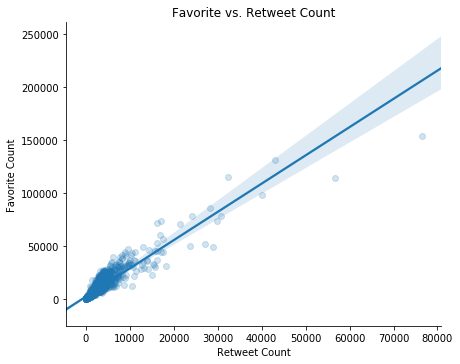

In [51]:
import seaborn as sns
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

#### Insight two:
> It appers as though the frequency of rating below 10 has decreased overtime. Before 2016 there were many ratings below 10 but after that there were hardly any. 

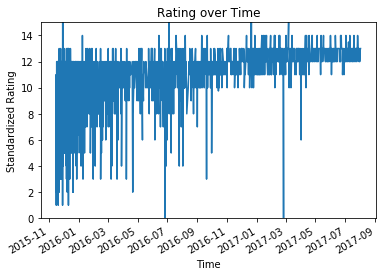

In [52]:
# Plot standardized ratings over time 
df_twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 15)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

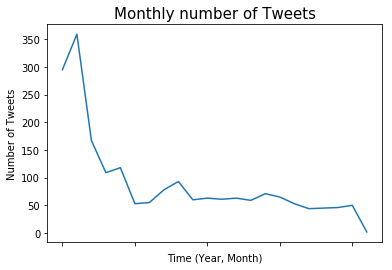

In [56]:
selected_data = df_twitter['tweet_id'].groupby([df_twitter['timestamp'].dt.year, df_twitter['timestamp'].dt.month]).count()
selected_data.plot('line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

#### Insight three:
>The majority of rating numerators is between 10 & 12

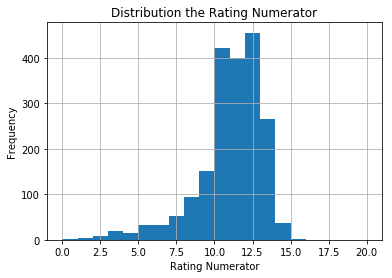

In [54]:
df_twitter.hist(column='rating_numerator', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution the Rating Numerator')
plt.savefig('rating_numerator_dist');

#### Insight four:
>The most popular source for twitter is the Twitter_for_iPhone, followed by Twitter_web_Client and TweetDeck

In [57]:
df_twitter['source'].value_counts()

Twitter for iPhone    1886
Twitter Web Client      26
TweetDeck               10
Name: source, dtype: int64

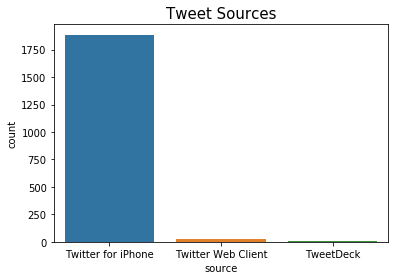

In [59]:
sns.countplot(data=df_twitter, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');